<a href="https://colab.research.google.com/github/Vianneydsouza/Machine-Learning-Projects/blob/main/NN_Project_Vianney_Dsouza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Done in Google Colab

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
!pip install h5py
import h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Part A

###1. Data Import and Understanding

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/python/CSV/NN Project Data - Signal.csv') #reading the data
df.head(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
df.shape

(1599, 12)

In [ ]:
missing_data = df.isnull().sum()

In [ ]:
miss_data_percentage = (missing_data/len(df))*100
print(miss_data_percentage)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [ ]:
for col in df.columns:
  print(col,':', df[col].unique(), '\n----------------------')

Parameter 1 : [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5] 
----------------------
Parameter 2 : [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.

In [ ]:
duplicates = df.duplicated().sum()
print('Duplicate Records:', duplicates)

Duplicate Records: 240


In [ ]:
df.isnull().values.any()

False

In [ ]:
#getting duplicated rows to identify where are these duplicates located
df[df.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [ ]:
df = df.drop_duplicates(keep='first') #keeping only the first occurunces

In [ ]:
duplicates = df.duplicated().sum()
print('Duplicate Records:', duplicates)

Duplicate Records: 0


In [ ]:
df[df.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength


In [ ]:
df.shape

(1359, 12)

Text(0.5, 1.0, 'Distribution of Target Variable')

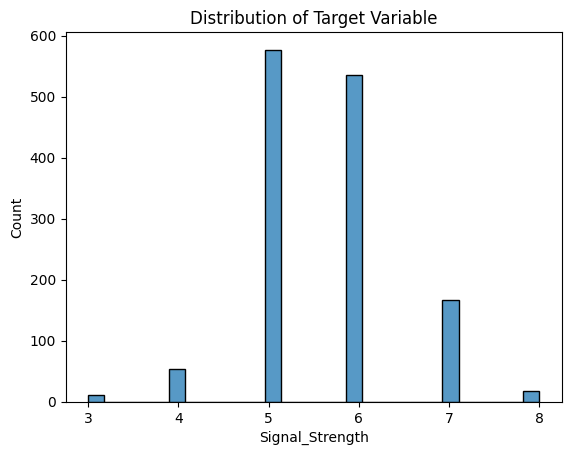

In [ ]:
#visualizing target variable
sns.histplot(df['Signal_Strength'])
plt.title('Distribution of Target Variable')

Insights:
1. Target Variable Distribution: The histogram indicates that the data points are concentrated towards the lower values of the signal strength with a smaller number of higher signal strength values. This skewness might impact the choice of model and evaluation metrics.

2. Mode: The most frequent signal strength appears to be 5. This suggests that the majority of data points fall within this category.

###2. Data preprocessing

In [ ]:
X = df.drop('Signal_Strength', axis=1)
y = df['Signal_Strength']

print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (1359, 11)
y Shape: (1359,)


In [ ]:
#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#printing shape of all the 4 variables
print('X Train Shape:', X_train.shape)
print('y Train Shape:', y_train.shape)
print('X Test Shape:', X_test.shape)
print('y Test Shape:', y_test.shape)

X Train Shape: (951, 11)
y Train Shape: (951,)
X Test Shape: (408, 11)
y Test Shape: (408,)


In [ ]:
scaler = MinMaxScaler().fit(X_train) #creating and fitting the min-maxscaler to the data

In [ ]:
#transforming the train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Before normalization:")
print(X_train.describe())

print("\nAfter normalization:")
print(pd.DataFrame(X_train_scaled).describe())

Before normalization:
       Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count   951.000000   951.000000   951.000000   951.000000   951.000000   
mean      8.333544     0.526151     0.274196     2.531283     0.087773   
std       1.761052     0.186114     0.195464     1.322431     0.048533   
min       5.000000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.100000     1.900000     0.070000   
50%       7.900000     0.510000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.430000     2.600000     0.091000   
max      15.900000     1.580000     0.790000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count   951.000000   951.000000   951.000000   951.000000    951.000000   
mean     15.875394    46.163512     0.996719     3.307676      0.655510   
std      10.569245    32.128833     0.001860     0.150629      0.159821   
min       1

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
y_encoded = onehot_encoder.fit_transform(df['Signal_Strength'].values.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y_encoded.shape

(1359, 6)

###3. Model Training & Evaluation using Neural Network

In [ ]:
# Assuming you have already split X into X_train and X_test
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=1)

In [ ]:
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=1)

In [ ]:
num_features = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=3,validation_data=(X_val, y_val_encoded))

test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print('Test accuracy:', test_acc)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3572 - loss: 2.3603 - val_accuracy: 0.5183 - val_loss: 1.2458
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4319 - loss: 1.2336 - val_accuracy: 0.5550 - val_loss: 1.2644
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5036 - loss: 1.1840 - val_accuracy: 0.4398 - val_loss: 1.1866
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4628 - loss: 1.1573 - val_accuracy: 0.4974 - val_loss: 1.1846
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4930 - loss: 1.1153 - val_accuracy: 0.4241 - val_loss: 1.2975
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4227 - loss: 1.2020 - val_accuracy: 0.4869 - val_loss: 1.2651
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5035 - loss: 1.1109 - val_accuracy: 0.5026 - val_loss: 1.0933
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5116 - loss: 1.1034 - val_accuracy: 0.5445 - val_

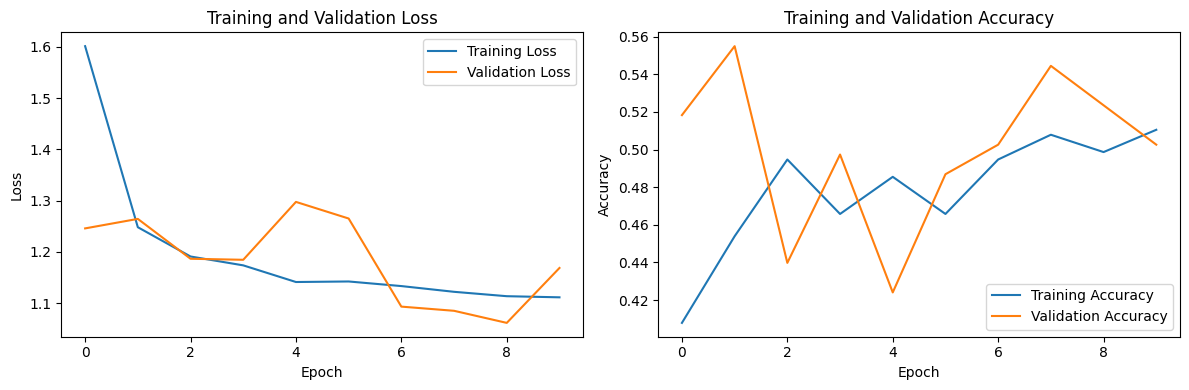

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dropout(0.2),  # Add dropout
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Add dropout
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=3,validation_data=(X_val, y_val_encoded))

test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print('Test accuracy:', test_acc)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2973 - loss: 5.0967 - val_accuracy: 0.4764 - val_loss: 2.0679
Epoch 2/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3782 - loss: 3.4701 - val_accuracy: 0.5445 - val_loss: 1.5511
Epoch 3/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3384 - loss: 3.3092 - val_accuracy: 0.4607 - val_loss: 1.3985
Epoch 4/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3532 - loss: 2.8848 - val_accuracy: 0.4607 - val_loss: 1.4248
Epoch 5/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4010 - loss: 2.4962 - val_accuracy: 0.4503 - val_loss: 1.3173
Epoch 6/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3838 - loss: 2.1378 - val_accuracy: 0.4869 - val_loss: 1.2420
Epoch 7/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4060 - loss: 1.9319 - val_accuracy: 0.4921 - val_loss: 1.2579
Epoch 8/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4035 - loss: 1.7563 - val_accuracy: 0.4974

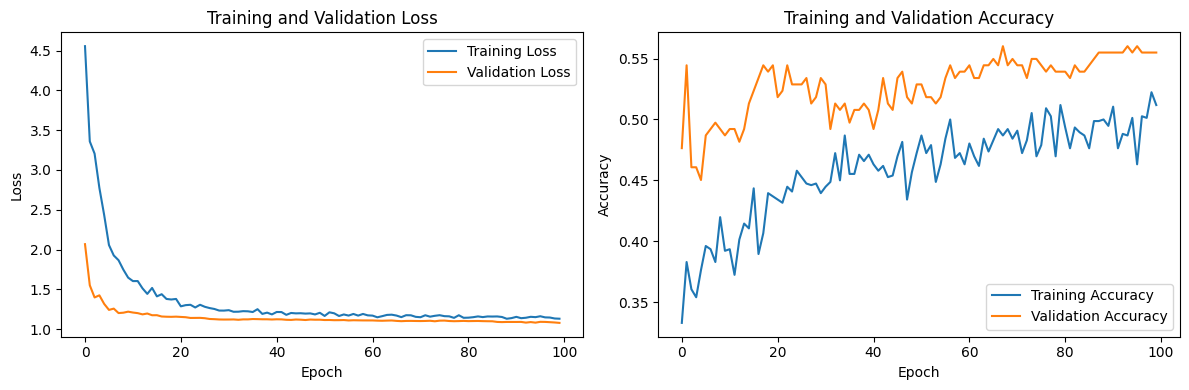

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Insights:

I adjusted the epochs from 10 to 100 which led to slight improvement.

Loss: The training loss is decreasing significantly, while the validation loss has stabilized. This indicates that the model is learning effectively and not overfitting.

Accuracy: Both training and validation accuracy are increasing, suggesting that the model is improving its performance on both seen and unseen data.

##Part B

###1. Data Import and Exploration

In [ ]:
f = h5py.File('/content/drive/MyDrive/python/CSV/Autonomous_Vehicles_SVHN_single_grey1.h5')

In [ ]:
print(list(f.keys())) #printing all the keys

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [ ]:
#splitting the data into train and test
X_train = f['X_train'][:]
X_val = f['X_val'][:]
X_test = f['X_test'][:]
y_train = f['y_train'][:]
y_val = f['y_val'][:]
y_test = f['y_test'][:]

In [ ]:
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (42000, 32, 32)
y_train Shape: (42000,)
X_val Shape: (60000, 32, 32)
y_val Shape: (60000,)
X_test Shape: (18000, 32, 32)
y_test Shape: (18000,)


###2. Data Visualisation and preprocessing

In [ ]:
#checking shape of the data
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (42000, 32, 32)
y_train Shape: (42000,)
X_val Shape: (60000, 32, 32)
y_val Shape: (60000,)
X_test Shape: (18000, 32, 32)
y_test Shape: (18000,)


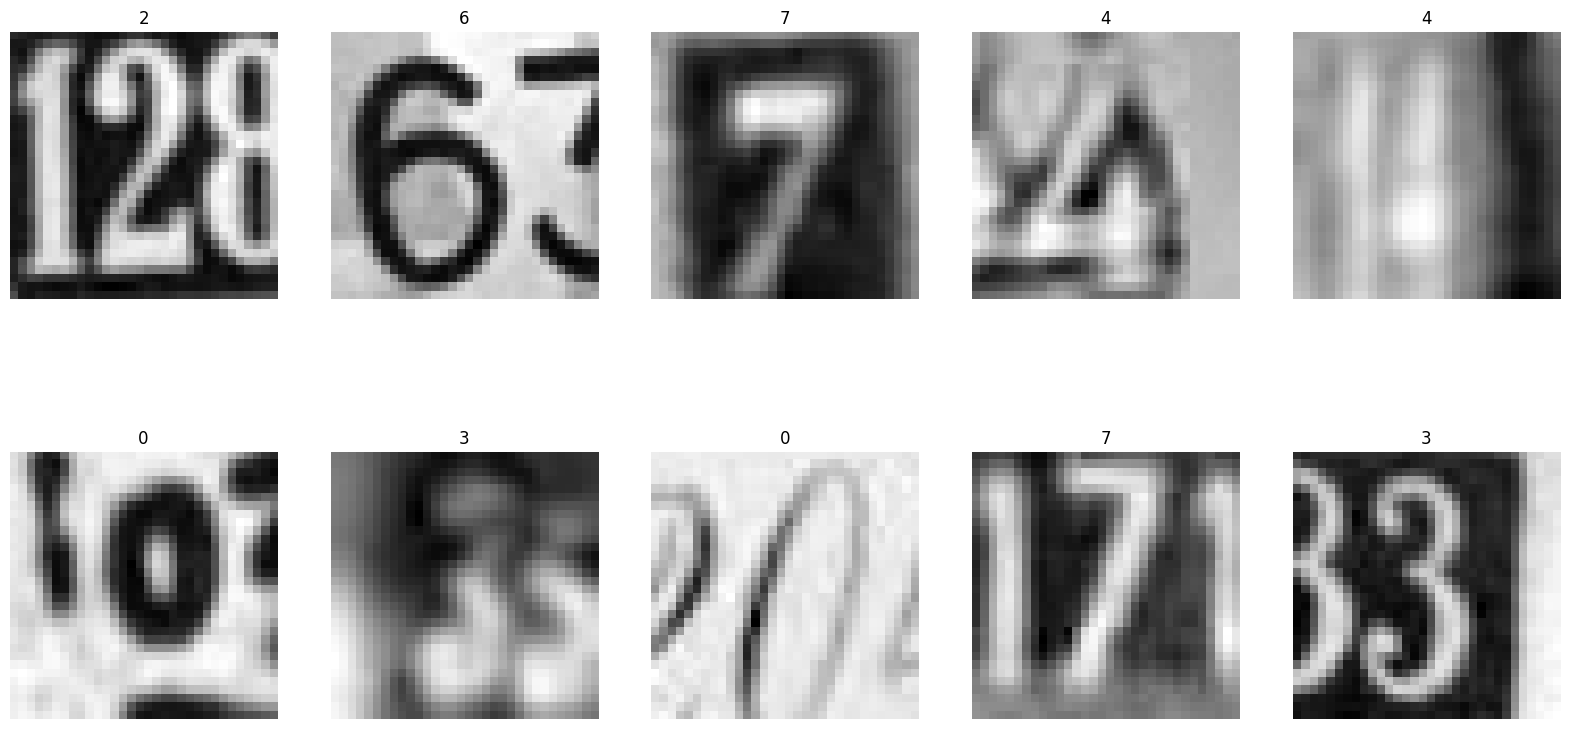

In [ ]:
#visualizing first 10 images from training dataset
plt.figure(figsize=(20,10))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')

In [ ]:
#calculating min and max values of the pixel
X_train_min_max = X_train.min(), X_train.max()
X_val_min_max = X_val.min(), X_val.max()
X_test_min_max = X_test.min(), X_test.max()

print('X_train Min Max:', X_train_min_max)
print('X_val Min Max:', X_val_min_max)
print('X_test Min Max:', X_test_min_max)

X_train Min Max: (0.0, 254.9745)
X_val Min Max: (0.0, 254.9745)
X_test Min Max: (0.0, 254.9745)


In [ ]:
#reshaping the data
X_train = X_train.reshape(42000, 32*32)
X_val = X_val.reshape(X_val.shape[0], 32*32)
X_test = X_test.reshape(X_test.shape[0], 32*32)

print('X_train Shape:', X_train.shape)
print('X_val Shape:', X_val.shape)
print('X_test Shape:', X_test.shape)

X_train Shape: (42000, 1024)
X_val Shape: (60000, 1024)
X_test Shape: (18000, 1024)


In [ ]:
# normalising the pixel values

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print('X_train Min Max:', X_train.min(), X_train.max())
print('X_val Min Max:', X_val.min(), X_val.max())
print('X_test Min Max:', X_test.min(), X_test.max())

X_train Min Max: 0.0 0.9999
X_val Min Max: 0.0 0.9999
X_test Min Max: 0.0 0.9999


In [ ]:
#checking for unique values
print('y_train unique values:', set(y_train))
print('y_val unique values:', set(y_val))
print('y_test unique values:', set(y_test))

y_train unique values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
y_val unique values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
y_test unique values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
#transforming labels of train and test in one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
print('After one hot encoding:', y_train[0])

After one hot encoding: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#checking total number of classes
unique_classes_train = np.unique(y_train)
unique_classes_val = np.unique(y_val)
unique_classes_test = np.unique(y_test)

total_classes = len(unique_classes_train) + len(unique_classes_val) + len(unique_classes_test)

print('Total number of classes:', total_classes)

Total number of classes: 6


###3. Model Training & Evaluation using Neural Network

In [ ]:
#designing neural network to train a classifier
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1024, )),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1157 - loss: 2.2884 - val_accuracy: 0.2661 - val_loss: 2.0034
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3379 - loss: 1.8494 - val_accuracy: 0.4793 - val_loss: 1.5174
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4973 - loss: 1.4906 - val_accuracy: 0.5424 - val_loss: 1.3810
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5441 - loss: 1.3797 - val_accuracy: 0.6035 - val_loss: 1.2547
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5959 - loss: 1.2690 - val_accuracy: 0.6202 - val_loss: 1.2060
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6198 - loss: 1.2050 - val_accuracy: 0.6347 - val_loss: 1.1628
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6364 - loss: 1.1672 - val_accuracy: 0.6580 - val_loss: 1.1040
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6466 - loss: 1.131

In [ ]:
#evaluating metrics
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model.evaluate(X_val, y_val, verbose=0)
print('\nValidation loss:', score[0])
print('Validation accuracy:', score[1])

score = model.evaluate(X_train, y_train, verbose=0)
print('\nTrain loss:', score[0])
print('Train accuracy:', score[1])

Test loss: 1.0849547386169434
Test accuracy: 0.6653333306312561

Validation loss: 1.0752747058868408
Validation accuracy: 0.6674500107765198

Train loss: 1.071126103401184
Train accuracy: 0.6683571338653564


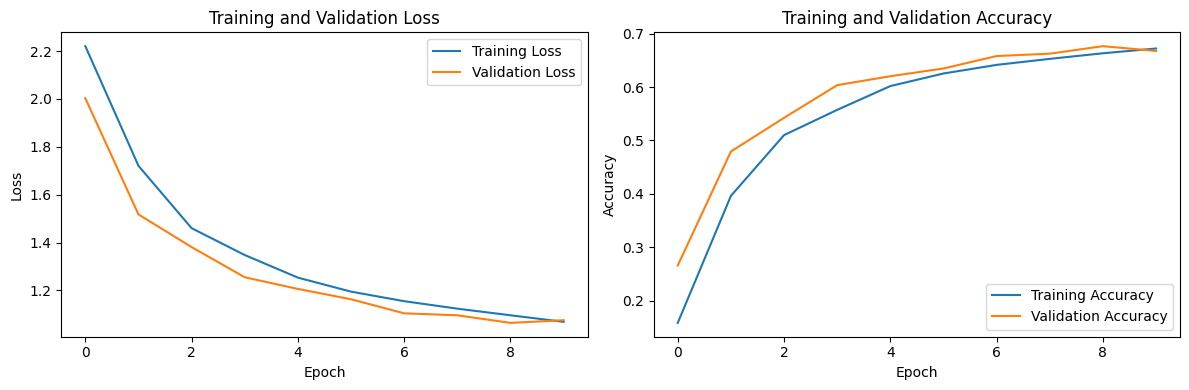

In [ ]:
#Plotting the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Observations:

Loss:
Both training and validation loss decrease over the epochs, indicating that the model is learning.
The training loss is consistently lower than the validation loss, suggesting a degree of overfitting. The model is performing better on the training data than on unseen validation data.

Accuracy:
Both training and validation accuracy increase over the epochs, which is a positive sign.
The training accuracy is slightly higher than the validation accuracy, again indicating a degree of overfitting.